# K-Nearest Neighbours

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [35]:
IMAGE_SIZE = 64

X = np.load("./data/X.npy")
X = X.reshape(len(X), 64*64) # mise a plat de l image

y_ = np.load("./data/Y.npy")

# Équivalence encodage/traduction
dic_equiv = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2 , 9:5} 

y = np.zeros(len(y_))
for k in range(len(y)):
    a = y_[k]
    y[k] = int(dic_equiv[np.where(a==1)[0][0]])
y = y.astype(int)

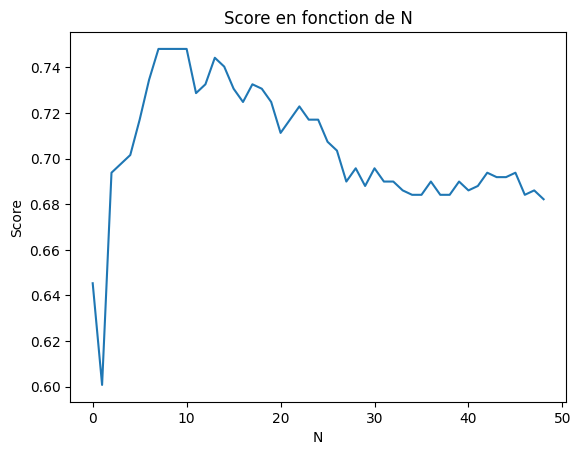

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

knns = []
scores = []

for n in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knns.append(knn)

    score = knn.score(X_test, y_test)
    scores.append(score)

plt.plot(scores)
plt.title("Score en fonction de N")
plt.xlabel("N")
plt.ylabel("Score")
plt.show()

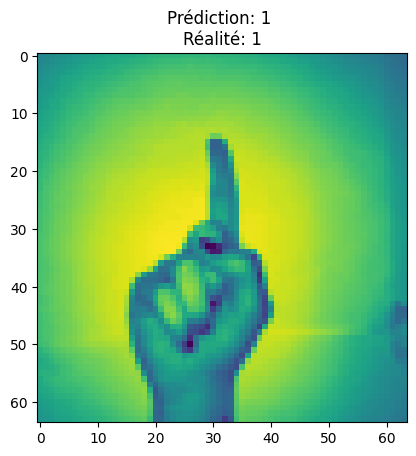

In [37]:
best_knn = knns[scores.index(max(scores))]

prediction = best_knn.predict([X_test[0]])
plt.imshow(X_test[0].reshape((IMAGE_SIZE, IMAGE_SIZE)))
plt.title(f"Prédiction: {prediction[0]} \nRéalité: {y_test[0]}")
plt.show()

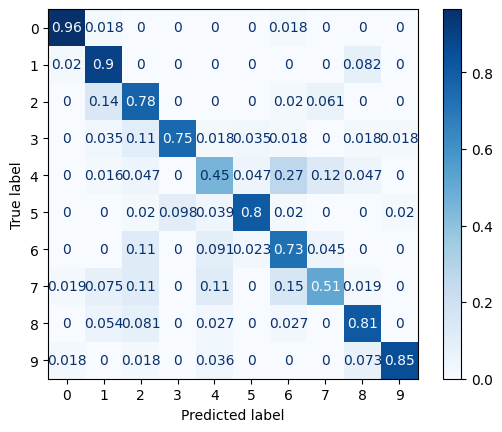

In [38]:
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap=plt.cm.Blues, display_labels=range(0, 10), normalize="true")
plt.show()